In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('mydata/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
dataset.shape

(30, 2)

In [4]:
X = dataset.drop(['Salary'], axis = True)
y = dataset['Salary']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

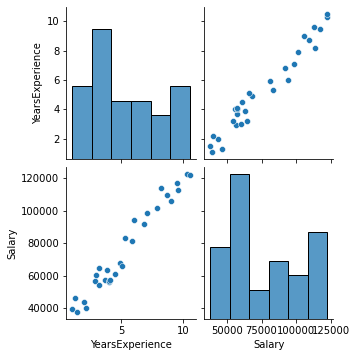

In [7]:
sns.pairplot(dataset)

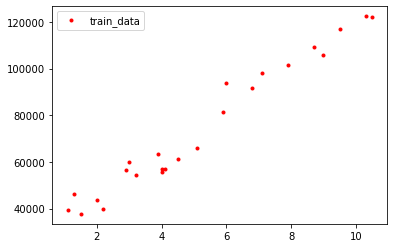

In [8]:
plt.plot(X_train, y_train, 'r.', label = 'train_data')
plt.legend()
plt.show()

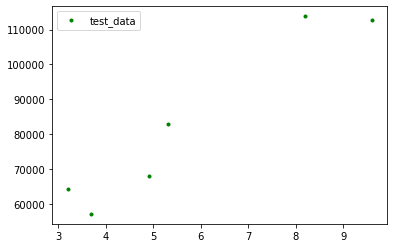

In [9]:
plt.plot(X_test, y_test, 'g.', label = 'test_data')
plt.legend()
plt.show()

In [12]:
#TRAIN
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = regressor.predict(X_test).round(1)

In [14]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Salary', 'Predicted Salary'])
hesaplama

,Original Salary,Predicted Salary
0,112635.0,115790.2
1,67938.0,71498.3
2,113812.0,102596.9
3,83088.0,75267.8
4,64445.0,55477.8
5,57189.0,60189.7


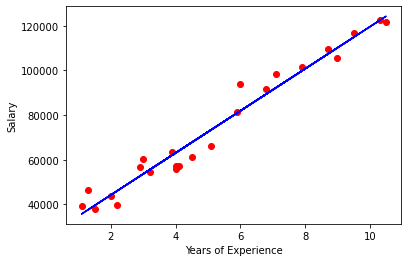

In [15]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

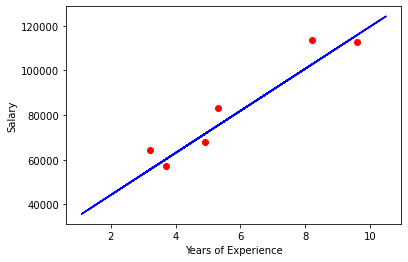

In [16]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [17]:
#Polynomial Linear Regression
"""
y = a + b*x + c*x^2 + .... + n*x^n + ....
"""

'\ny = a + b*x + c*x^2 + .... + n*x^n + ....\n'

In [19]:
dataset = pd.read_csv('mydata/Position_Salaries.csv')
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [20]:
dataset = dataset.drop(['Position'], axis = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


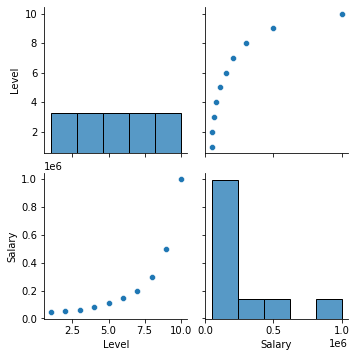

In [21]:
sns.pairplot(dataset)

In [22]:
X = dataset.drop(['Salary'], axis = True)
y = dataset['Salary']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
print("Training Accuracy : ", lin_reg.score(X_train, y_train))
print("Testing Accuracy : ", lin_reg.score(X_test, y_test))

Training Accuracy :  0.6366049276570868
Testing Accuracy :  0.8451346684575975


In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
lin_reg_2 = LinearRegression()
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2.fit(X_poly, y_train)
X_poly_test = poly_reg.transform(X_test)

In [28]:
print("Training Accuracy : ", lin_reg_2.score(X_poly, y_train))
print("Testing Accuracy : ", lin_reg_2.score(X_poly_test, y_test))

Training Accuracy :  0.9995857211026754
Testing Accuracy :  0.9714666803841844


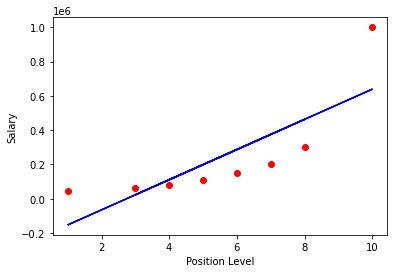

In [29]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

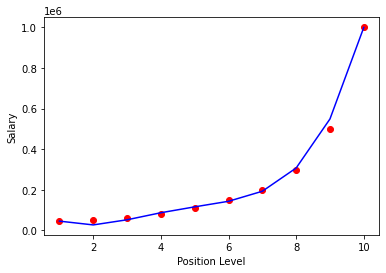

In [30]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [31]:
#Multiple Linear Regression
"""
y = b0 + b1*x1 + b2*x2 + ... + bn*xn
"""

'\ny = b0 + b1*x1 + b2*x2 + ... + bn*xn\n'

In [32]:
dataset = pd.read_csv('mydata/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [33]:
dataset.shape

(50, 5)

In [34]:
dataset = dataset.drop('State', axis = True)

In [35]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<AxesSubplot:>

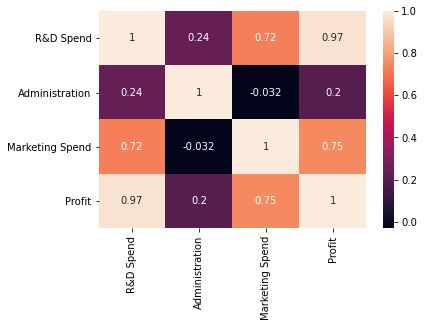

In [36]:
corr = dataset.corr()
sns.heatmap(corr, annot = True)

In [37]:
X = dataset.drop('Profit', axis = True)
y = dataset['Profit']

In [38]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [40]:
X

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
#TRAIN
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
#TEST
y_pred = regressor.predict(X_test).round(1)

In [45]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Profit', 'Predicted Profit'])
hesaplama.head(5)

,Original Profit,Predicted Profit
0,103282.38,103901.9
1,144259.40,132763.1
2,146121.95,133567.9
3,77798.83,72911.8
4,191050.39,179627.9


In [47]:
print("Training Accuracy : ", regressor.score(X_train, y_train))
print("Testing Accuracy : ", regressor.score(X_test, y_test))

Training Accuracy :  0.9499572530324031
Testing Accuracy :  0.9393955917820571


In [48]:
#Test the model

In [49]:
feature = [165349.20, 136897.80, 471784.10]
scale_feature = sc.transform([feature])
scale_feature

array([[2.01641149, 0.56075291, 2.15394309]])

In [50]:
y_pred_test = regressor.predict(scale_feature)

In [51]:
y_pred_test

array([192169.18440985])

In [52]:
regressor.intercept_

111297.71256204927

In [53]:
regressor.coef_

array([35391.2501208 ,   815.21987542,  4202.06618916])

In [ ]:
35391*2.01 + 815.21*0.56 + 4202.06*2.15 + 111297